# Predicting Pump Failue

## Part I: <span style="color:blue">Descriptive Statistics</span>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
import numpy as np
%matplotlib inline
mpl.rcParams['figure.figsize']=(20,10)
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set()

In [2]:
df_raw = pd.read_csv(r'C:\Users\Ben B\Documents\SWC_Updated_Case_Study_Python\DF_Raw_Data.csv', header=0)
df_stdev = pd.read_csv(r'C:\Users\Ben B\Documents\SWC_Updated_Case_Study_Python\DF_Rolling_Stdev.csv', header=0)
print(df_raw.describe())
print(df_raw.info())
print(df_stdev.describe())
print(df_stdev.info())

       Volumetric Flow Meter 1  Volumetric Flow Meter 2  Pump Speed (RPM)  \
count              2453.000000              2453.000000       2453.000000   
mean                 41.802629                41.796702         90.796576   
std                   3.656576                 3.654873         10.217885   
min                   0.000000                 0.000000          0.000000   
25%                  41.050000                41.000000         85.000000   
50%                  42.100000                42.140000         91.000000   
75%                  43.140000                43.130000         97.000000   
max                  45.900000                45.840000        124.000000   

       Pump Torque   Ambient Temperature  Horse Power  Pump Efficiency  \
count   2453.000000          2453.000000  2453.000000      2453.000000   
mean     202.851610            50.226661     3.540897        76.015149   
std       22.683977             5.298203     0.579055         6.651633   
min       

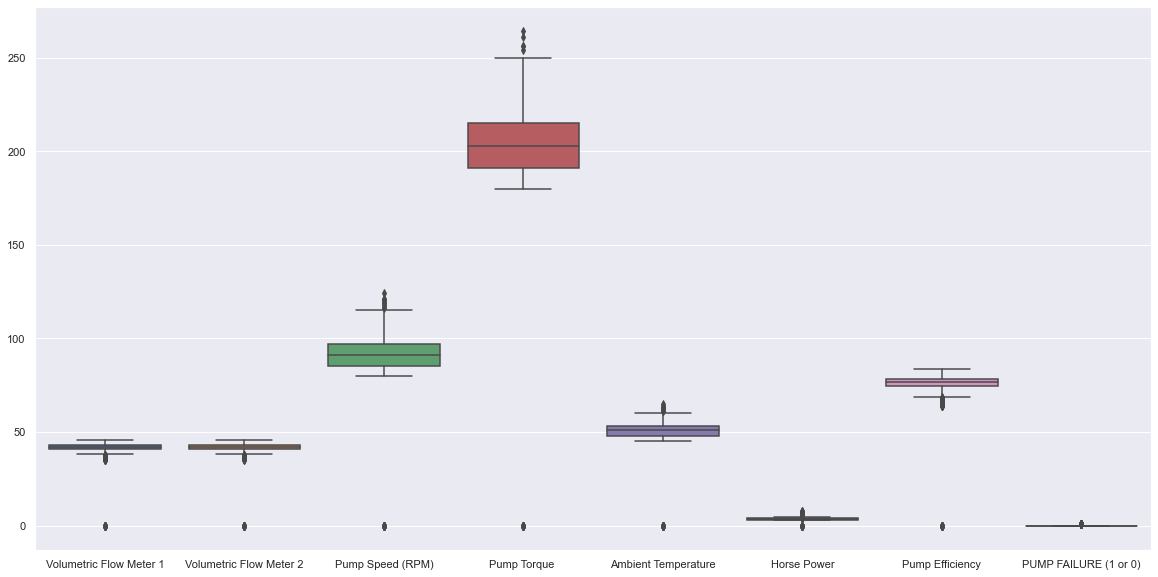

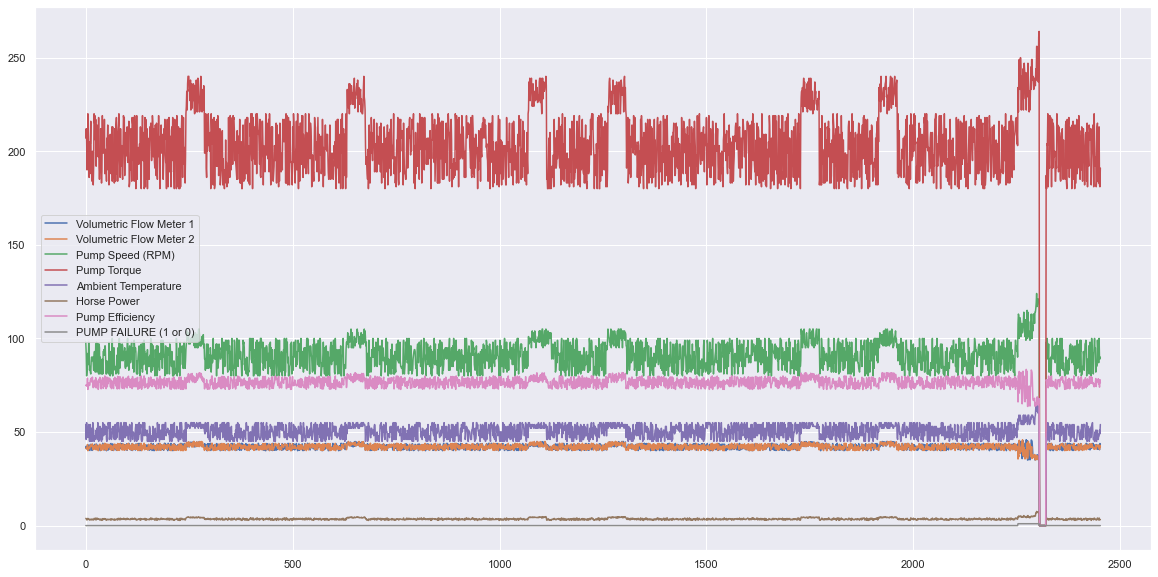

In [3]:
#raw data
boxplot = sns.boxplot(data=df_raw)
lineplot = df_raw.plot(figsize=(20,10))

Text(0.5, 1.0, 'Pump Normal')

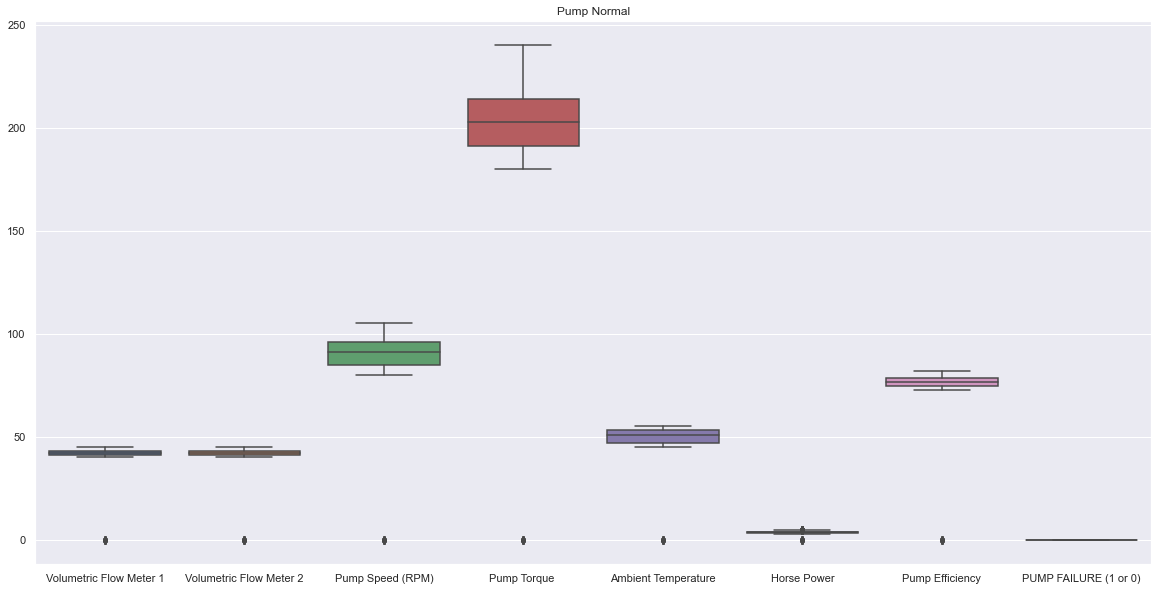

In [4]:
nor = df_raw[df_raw['PUMP FAILURE (1 or 0)'] == False]
sns.boxplot(data=nor).set_title('Pump Normal')

Text(0.5, 1.0, 'Pump FAILED')

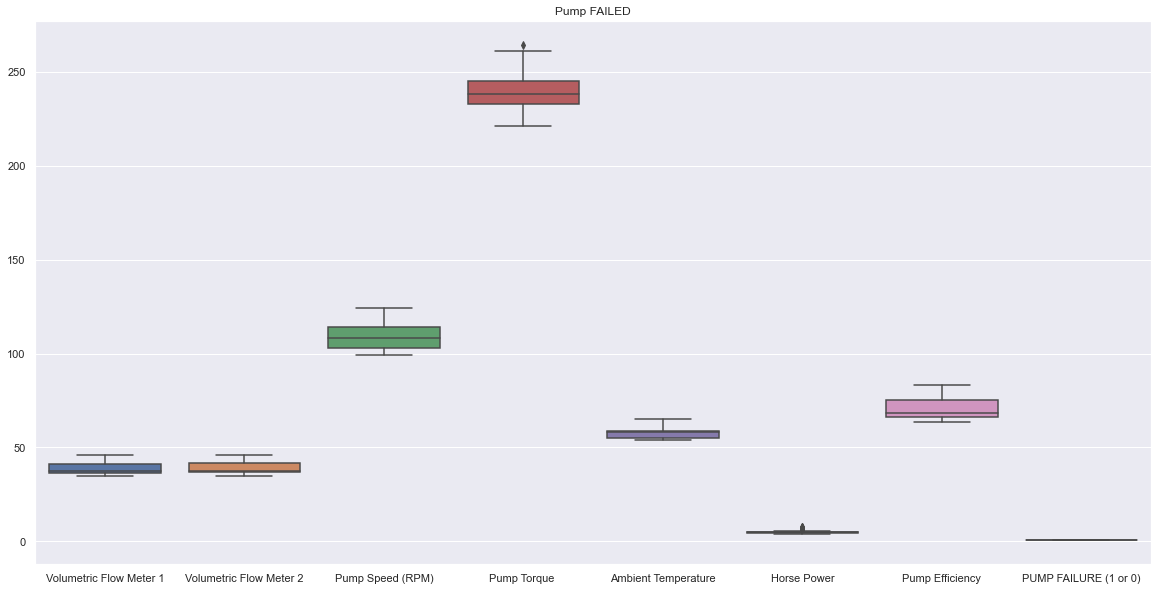

In [5]:
fail = df_raw[df_raw['PUMP FAILURE (1 or 0)'] == True]
sns.boxplot(data=fail).set_title('Pump FAILED')

In [7]:
Q1 = df_raw.quantile(0.25)
Q3 = df_raw.quantile(0.75)
IQR = Q3 - Q1
print('The IQR for this Dataset is:')
print(IQR)

The IQR for this Dataset is:
Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64


In [8]:
#removing outliers
ori = len(df_raw)
print('Num of Original Entries:', ori)

df_raw_out_gone = df_raw[~((df_raw < (Q1 - 1.5 * IQR)) |(df_raw > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers_gone = len(df_raw_out_gone)
print('Num of Entries with Outliers Removed:', outliers_gone)

proportion = (((ori - outliers_gone) / ori) * 100)
print('Proportion of Outilers:', round(proportion, 1), '%')

Num of Original Entries: 2453
Num of Entries with Outliers Removed: 2358
Proportion of Outilers: 3.9 %


Text(0.5, 1.0, 'Pump Normal, Outliers Removed')

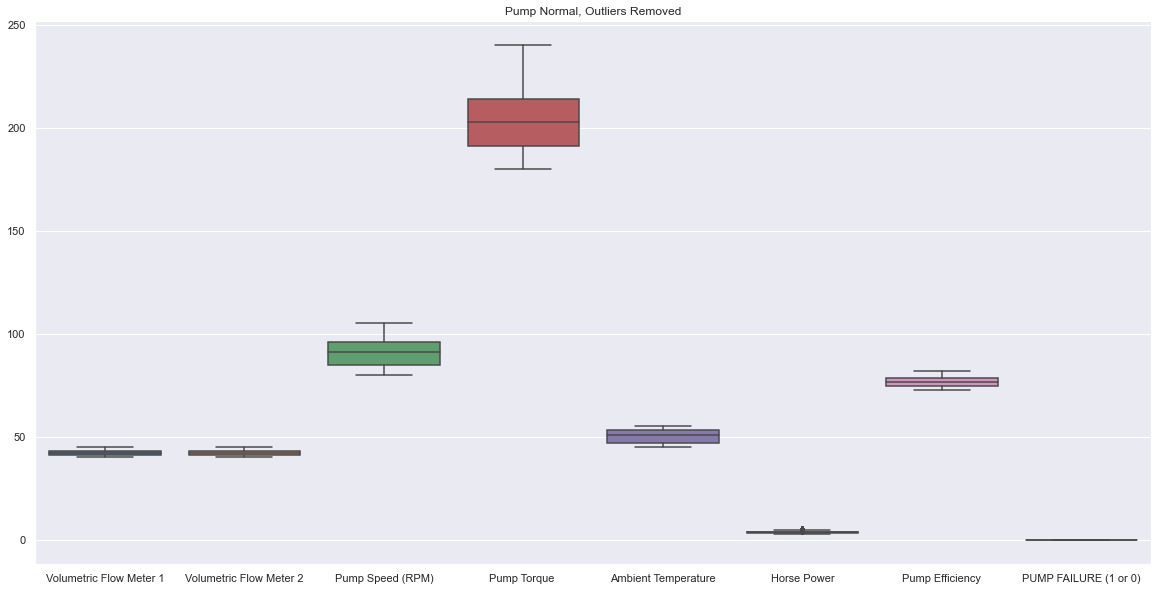

In [9]:
nor_out_gone = df_raw_out_gone[df_raw_out_gone['PUMP FAILURE (1 or 0)'] == False]
sns.boxplot(data=nor_out_gone).set_title('Pump Normal, Outliers Removed')
#nor_boxplot_out_gone = nor_out_gone.boxplot(figsize=(20,10)), plt.title('Pump Normal, Outliers Removed')

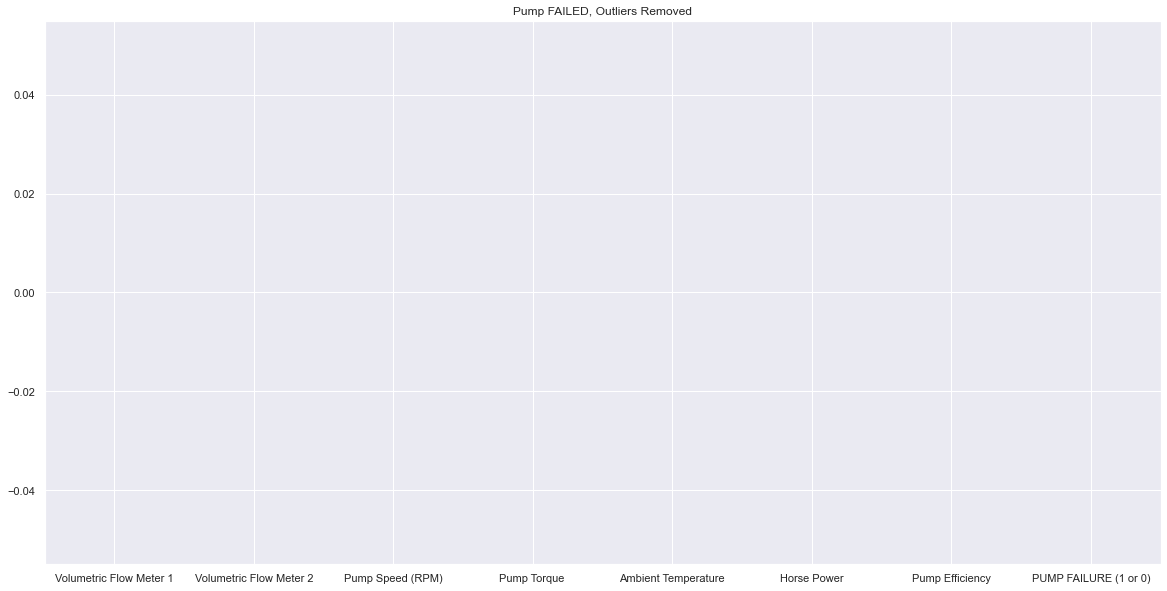

In [10]:
#there are no outliers for pump failure
fail_out_gone = df_raw_out_gone[df_raw_out_gone['PUMP FAILURE (1 or 0)'] == True]
fail_boxplot_out_gone = fail_out_gone.boxplot(figsize=(20,10)), plt.title('Pump FAILED, Outliers Removed')

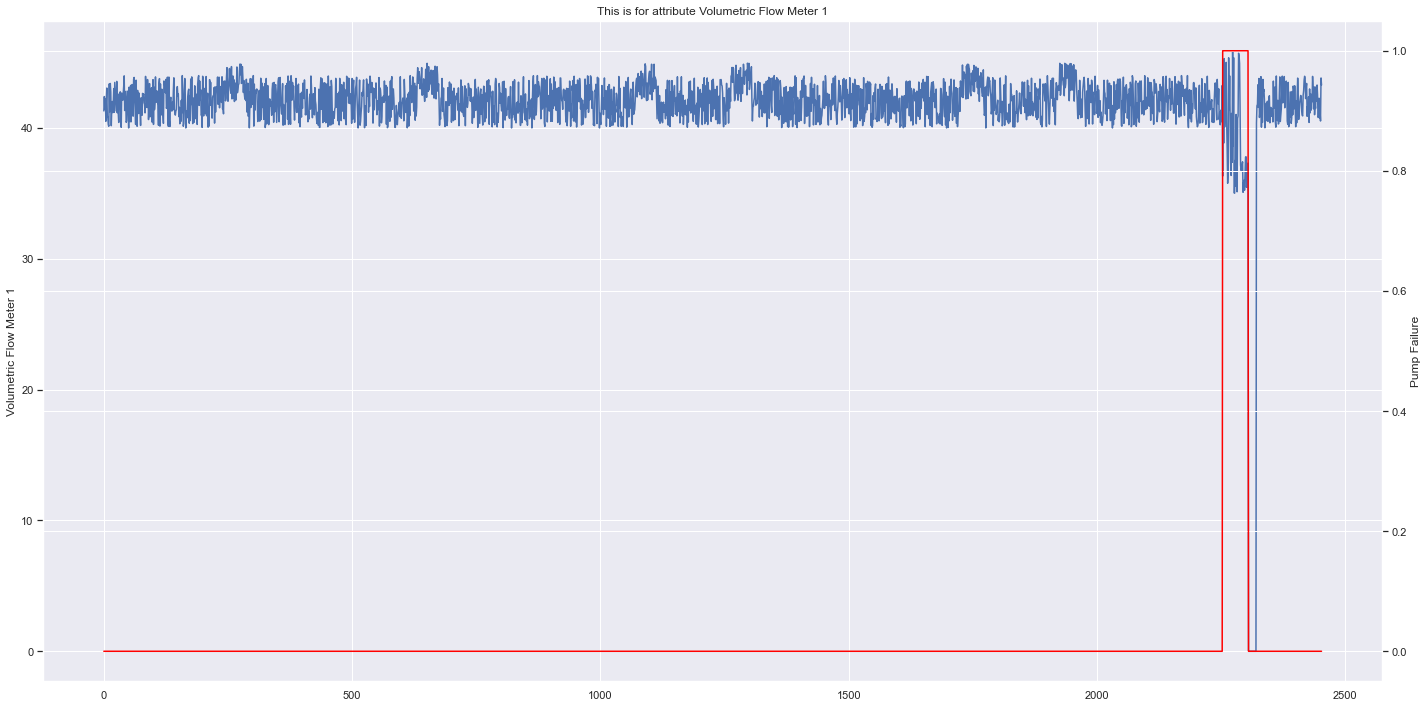

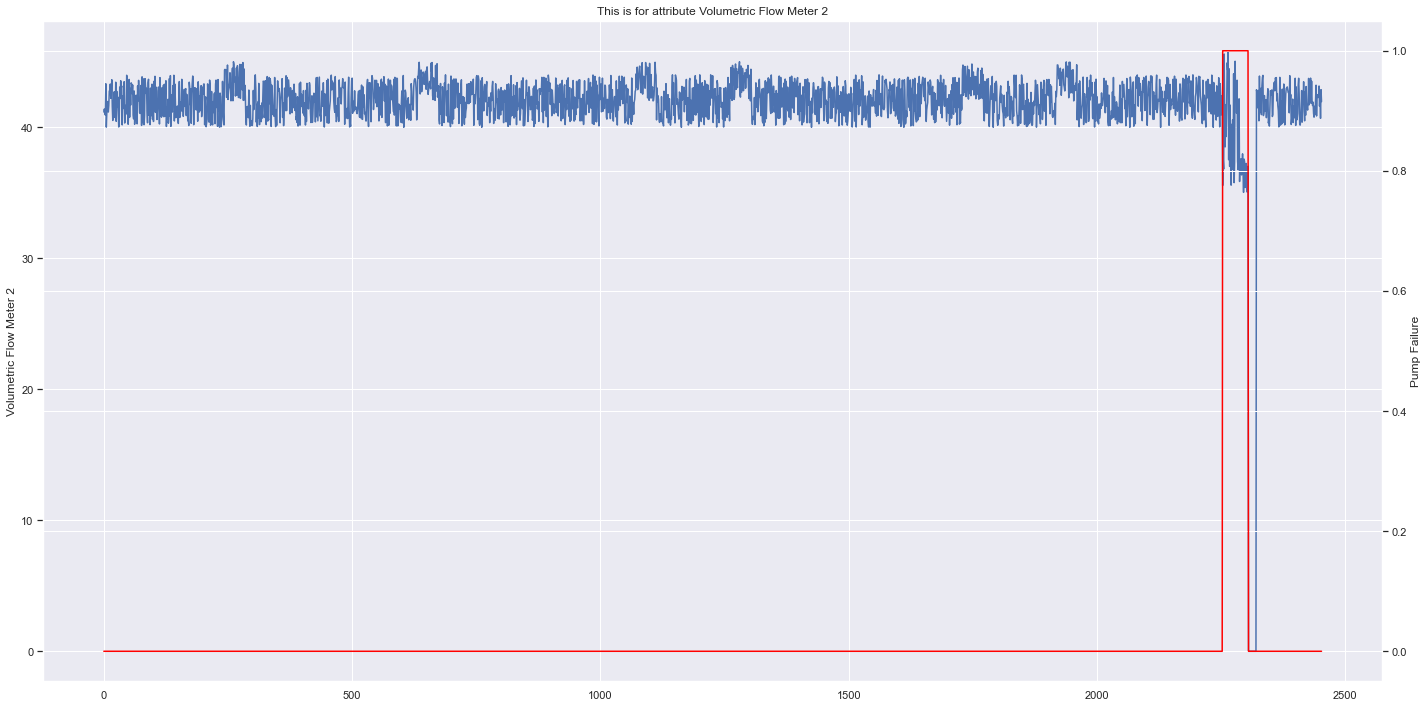

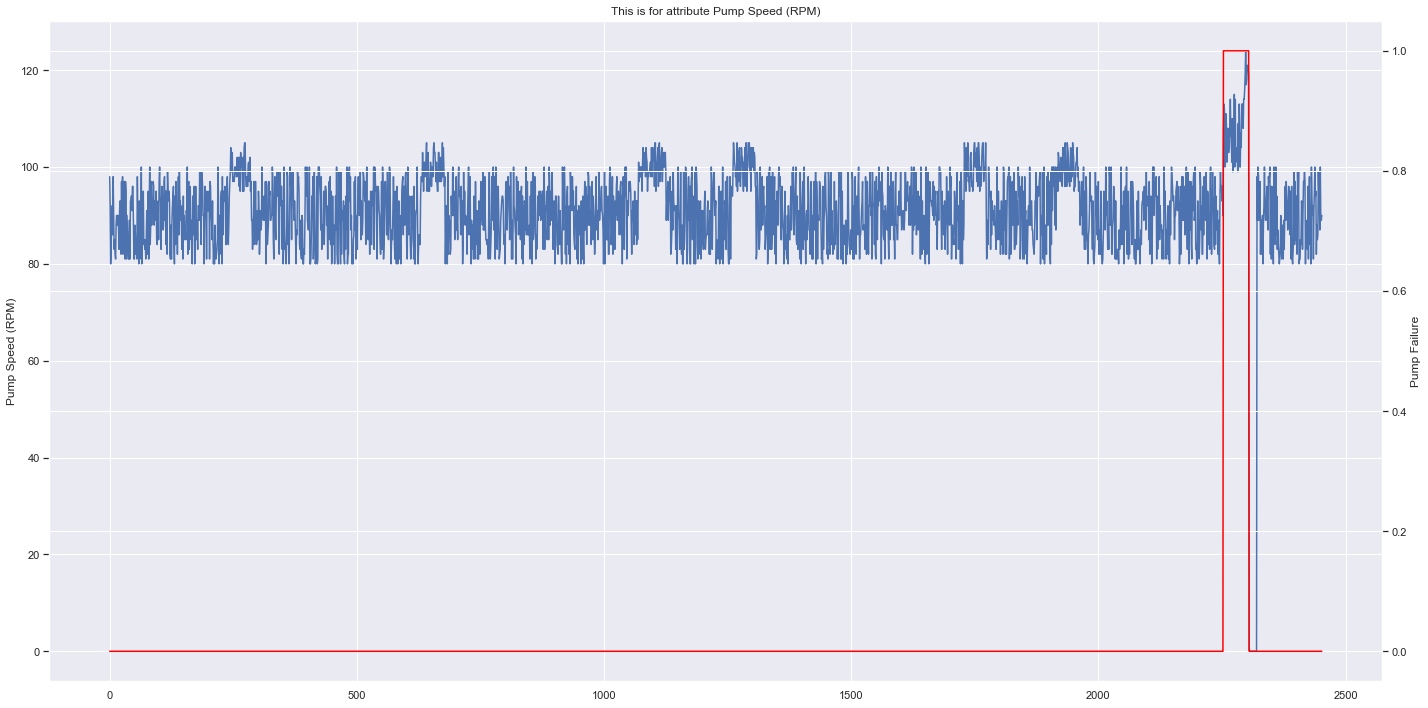

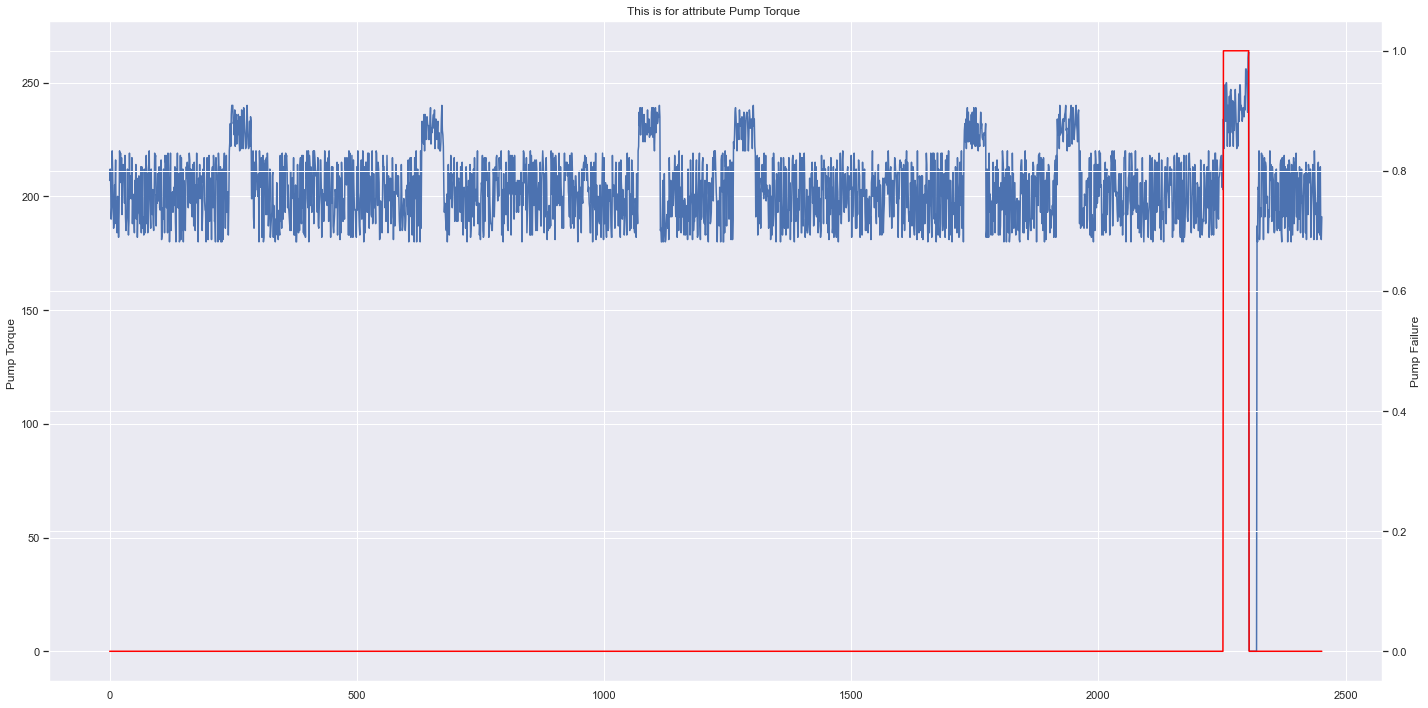

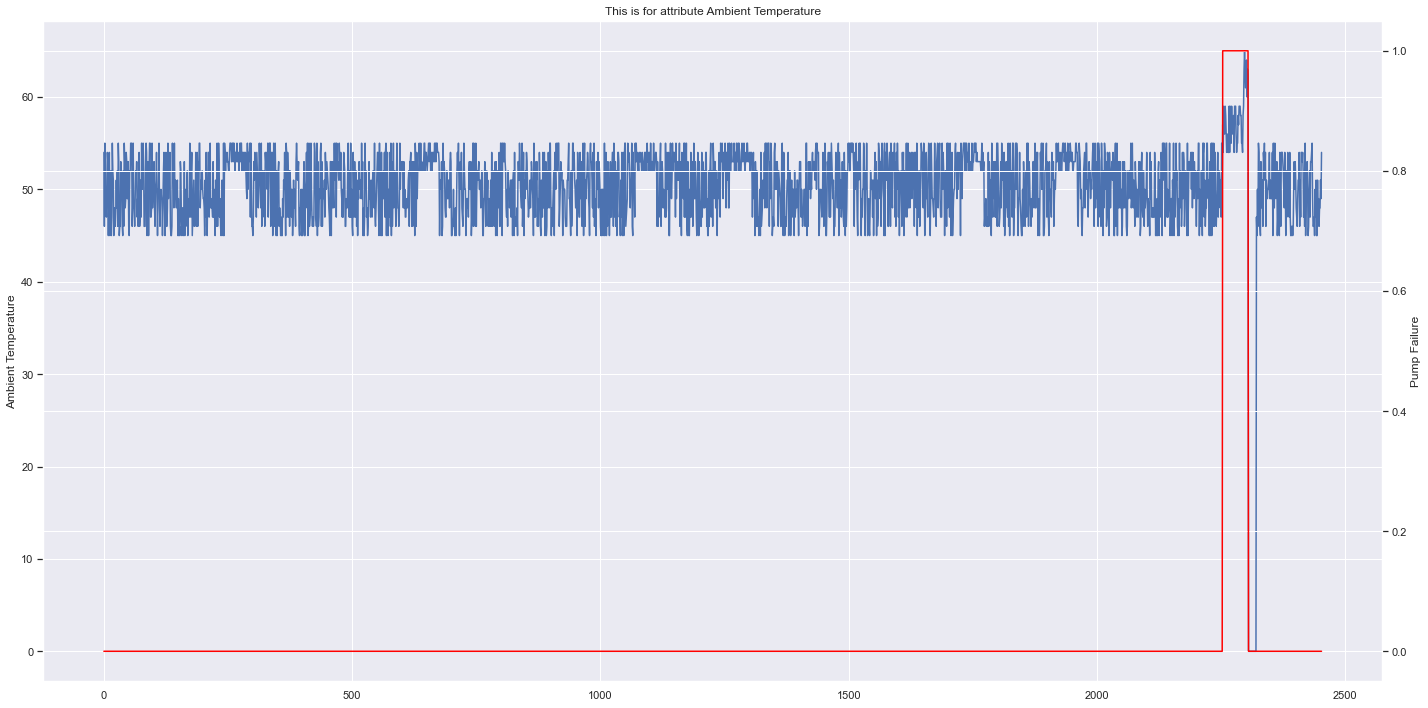

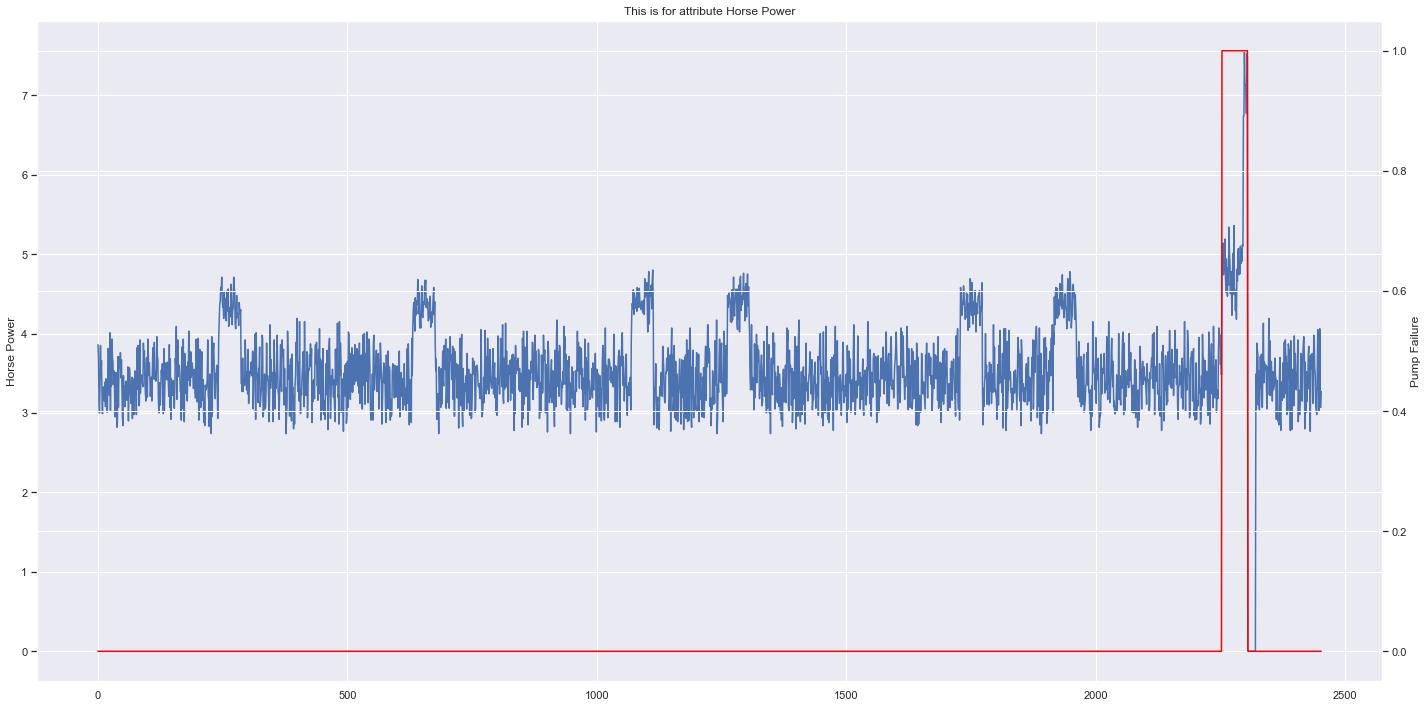

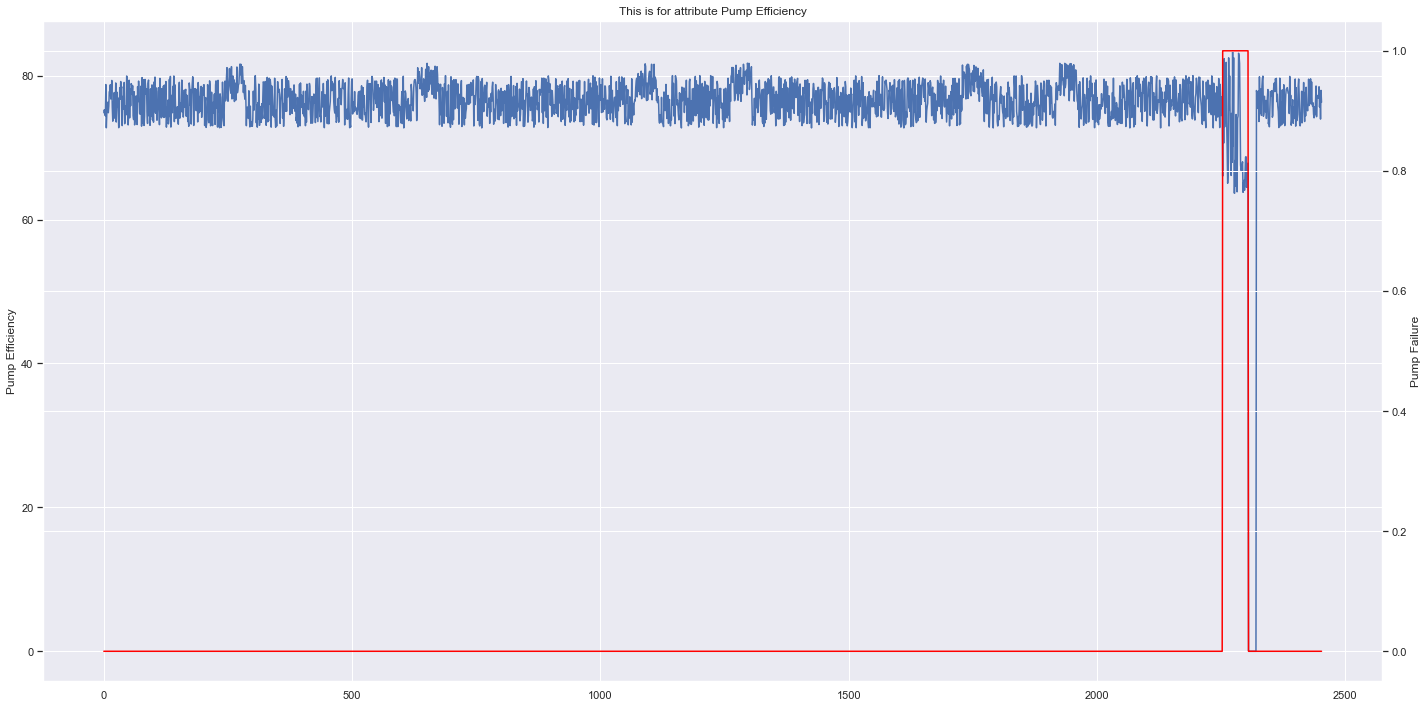

In [11]:
#plotting every vairiable against pump failure

for i in df_raw.drop(['TIMEFRAME (DD/MM/YYYY)', 'PUMP FAILURE (1 or 0)', 'Data Source'], axis = 1).columns:
    failure_state = df_raw['PUMP FAILURE (1 or 0)']
    ax = df_raw[i].plot()
    plt.ylabel(i)
    ax2 = ax.twinx()
    ax2.plot(failure_state, color = 'red')
    plt.title('This is for attribute ' + i)
    plt.ylabel('Pump Failure')
    plt.tight_layout()
    plt.show()

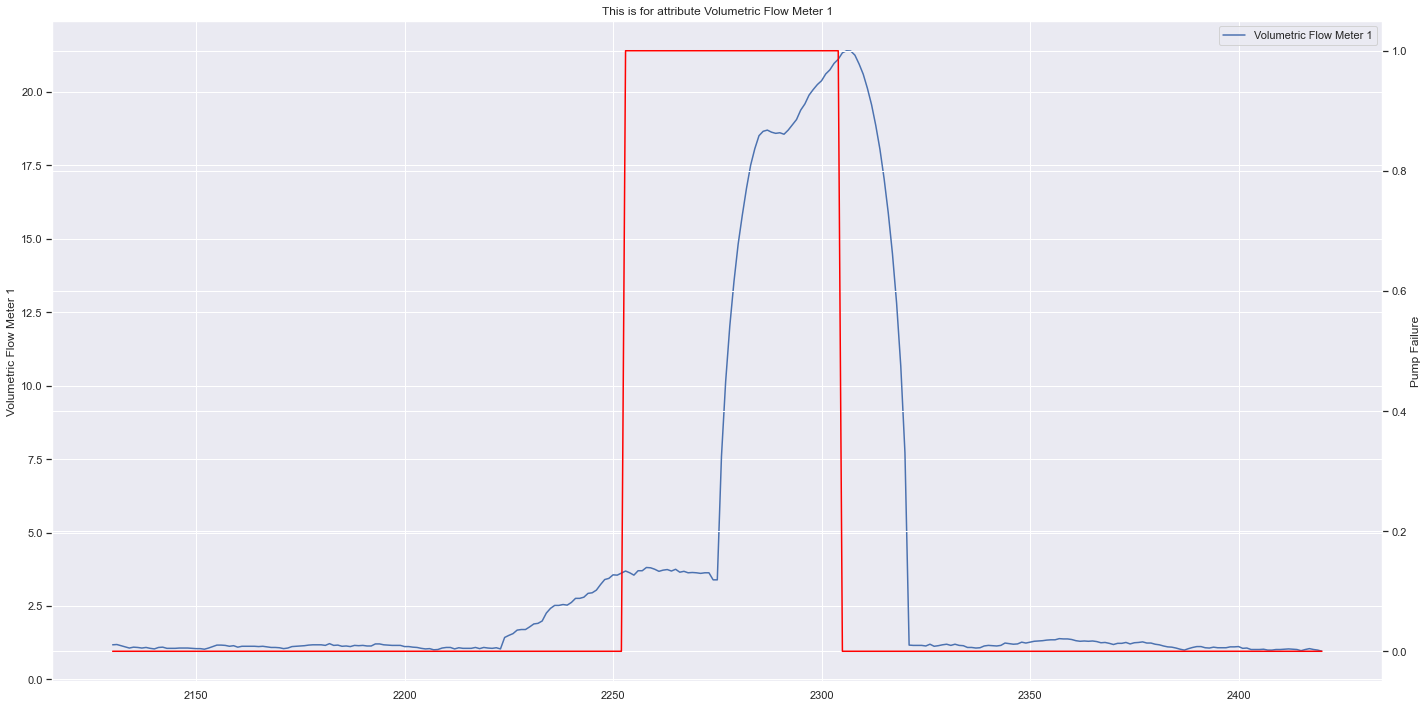

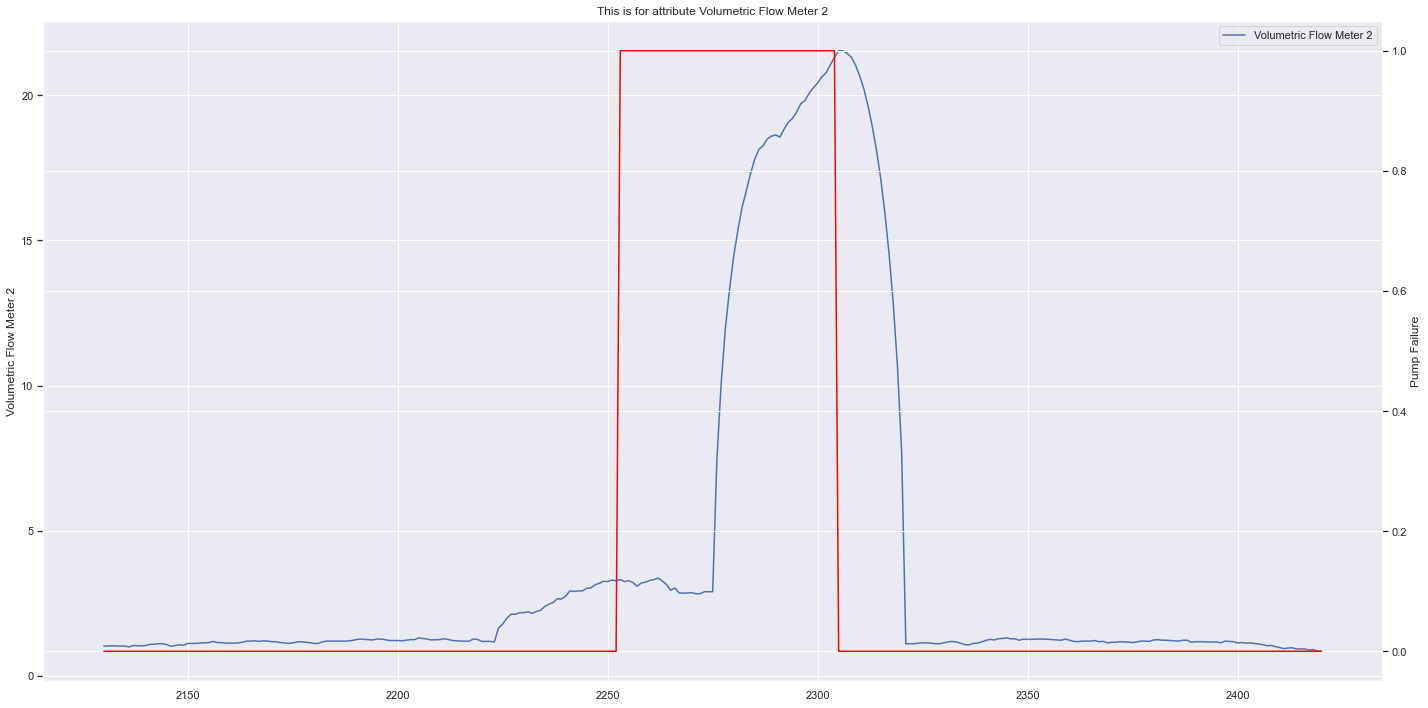

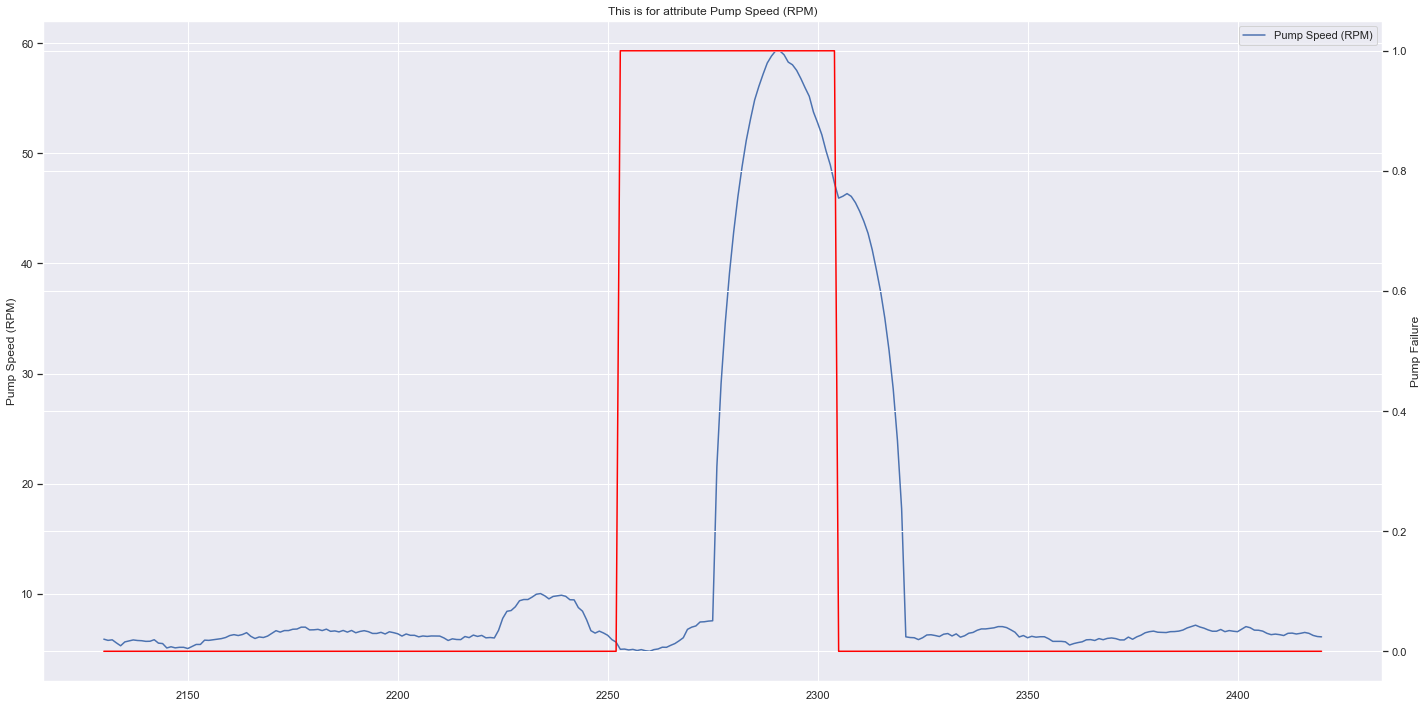

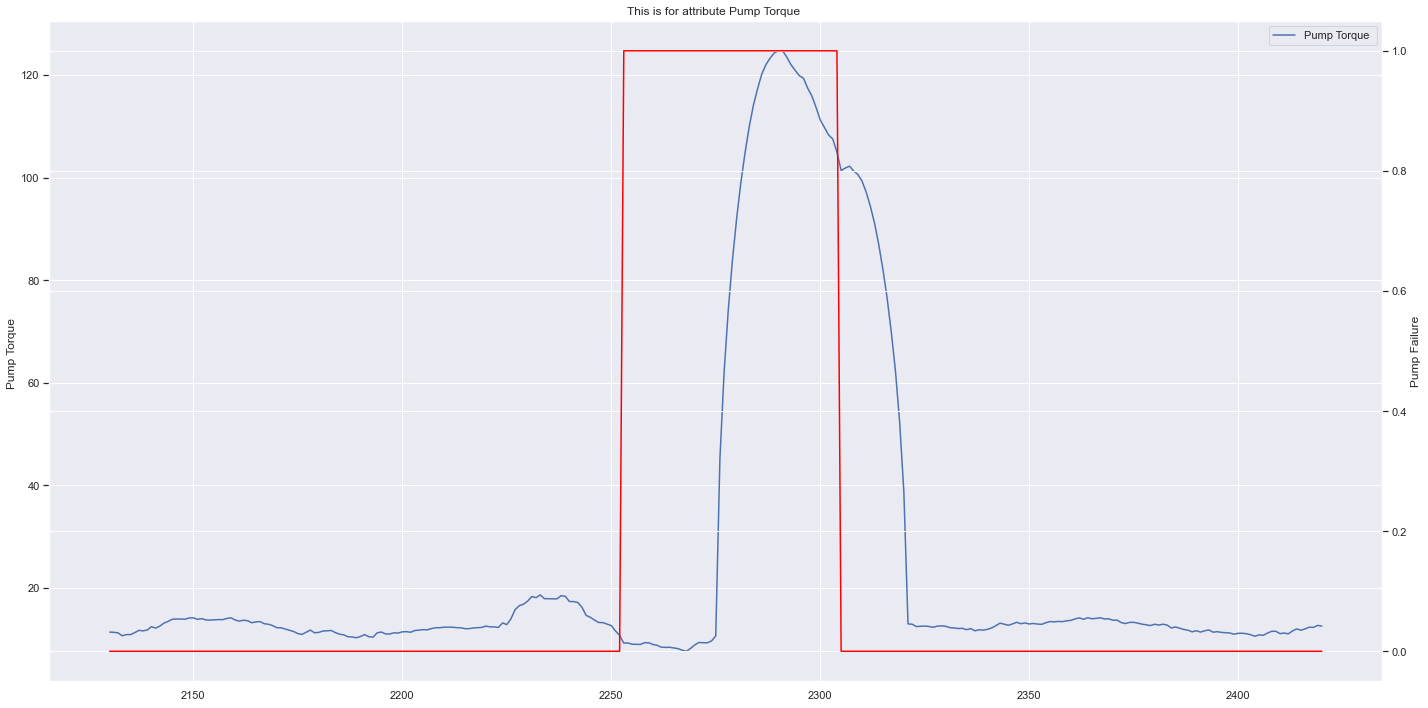

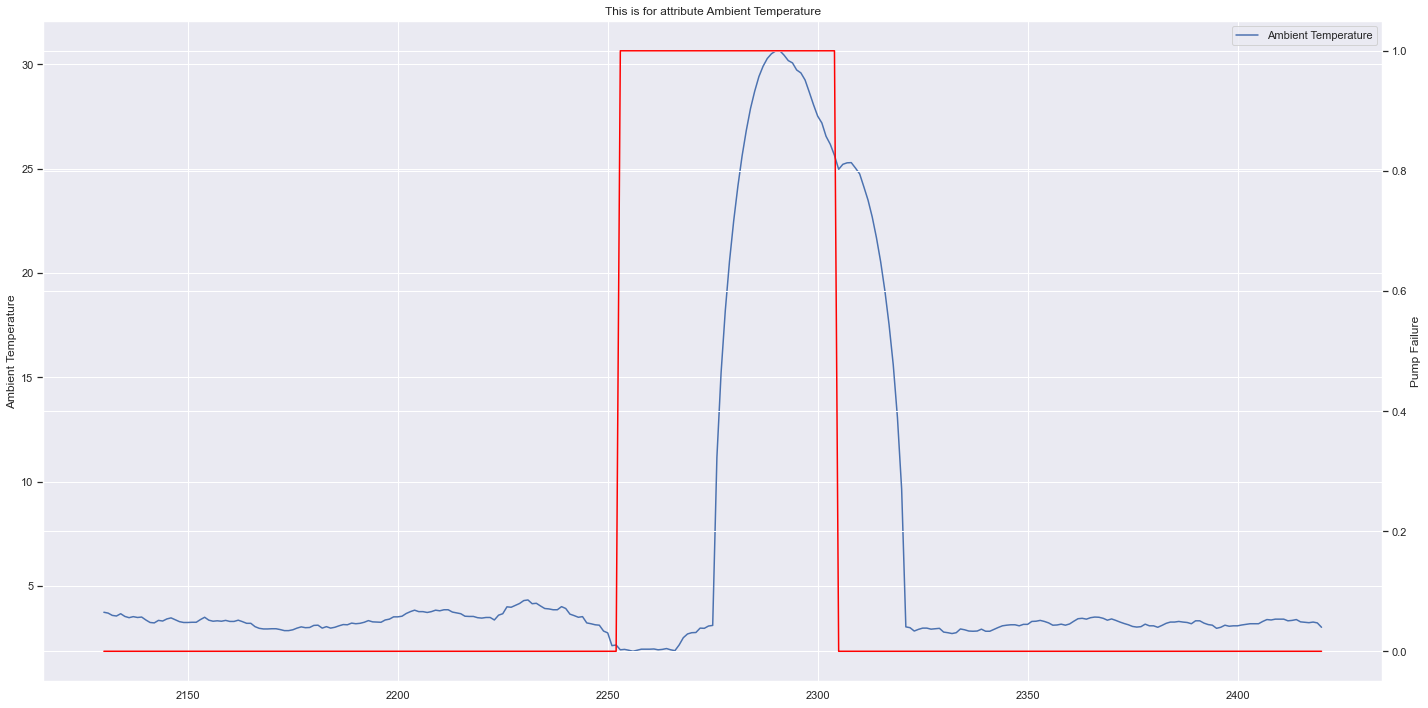

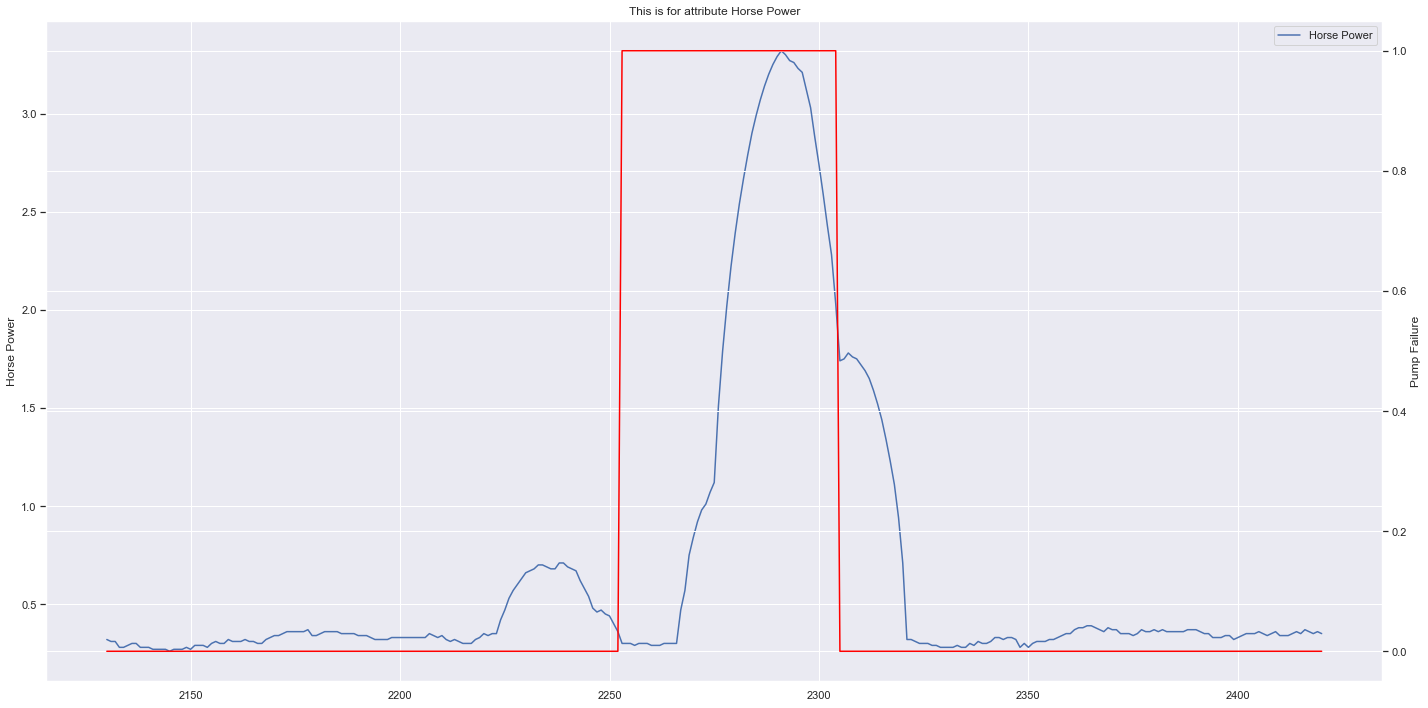

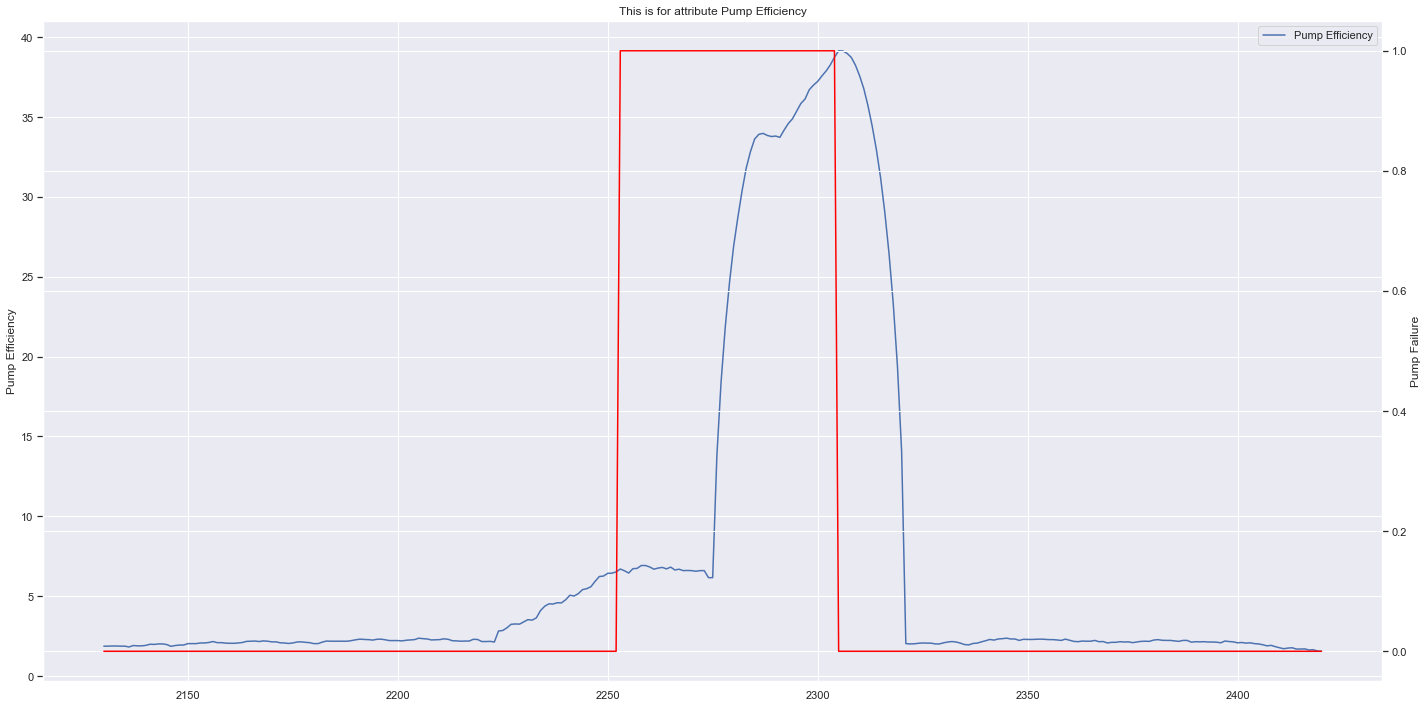

In [12]:
#filtering for time, using stdev
df_time_filtered = df_stdev[(df_stdev['TIMEFRAME (DD/MM/YYYY)'] <= "10/12/2014 16:30") & 
                            (df_stdev['TIMEFRAME (DD/MM/YYYY)'] >= "10/12/2014 11:30")]

for i in df_time_filtered.drop(['TIMEFRAME (DD/MM/YYYY)', 'PUMP FAILURE (1 or 0)', 'Data Source'], axis = 1).columns:
    failure_state = df_time_filtered['PUMP FAILURE (1 or 0)']
    ax = df_time_filtered[i].plot()
    plt.ylabel(i)
    ax2 = ax.twinx()
    ax2.plot(failure_state, color = 'red')
    ax.legend(loc="best")
    plt.title('This is for attribute ' + i)
    plt.ylabel('Pump Failure')
    plt.tight_layout()
    plt.show()

## Part II: <span style="color:blue">Inferential Statistical Analysis</span>

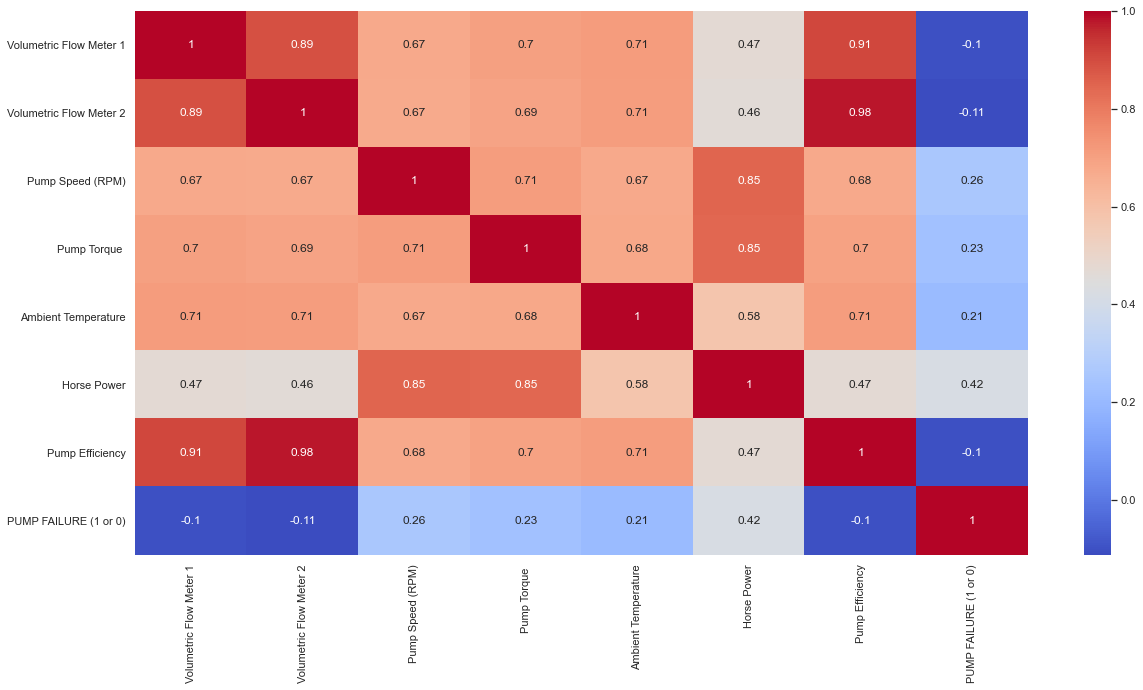

In [13]:
corr = df_raw.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

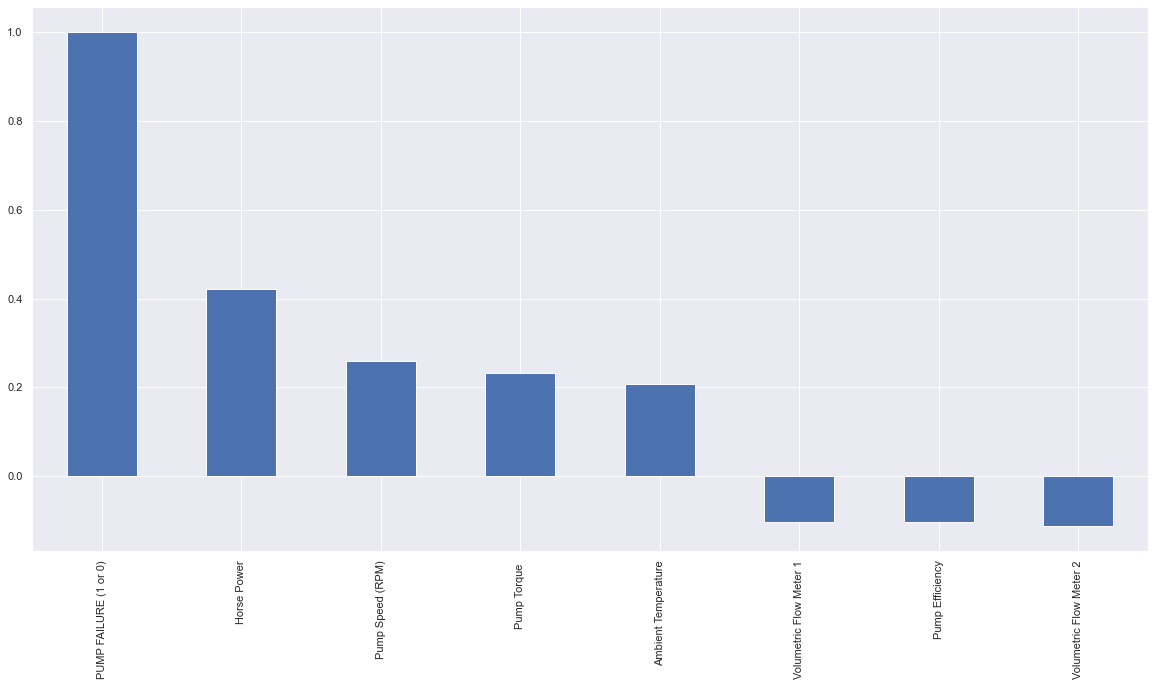

In [14]:
corr["PUMP FAILURE (1 or 0)"].sort_values(ascending=False).plot(kind='bar')

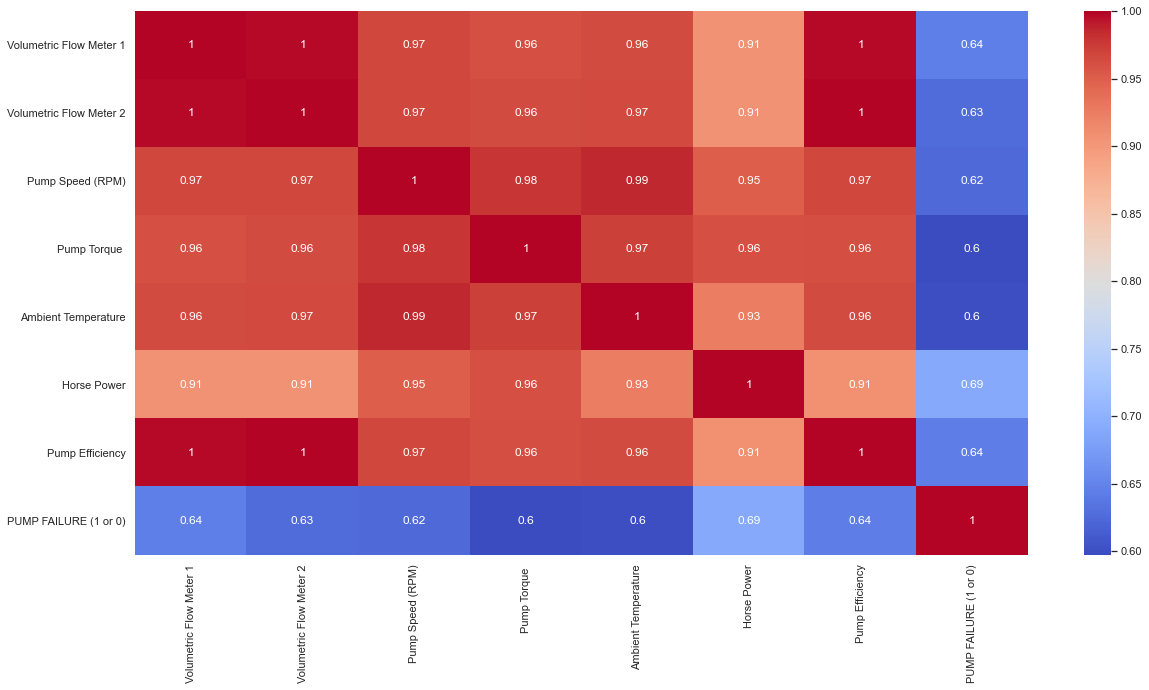

In [15]:
std_corr = df_stdev.corr()
sns.heatmap(std_corr, annot=True, cmap='coolwarm')

In [16]:
#creating multivariate regression model
y = df_raw['PUMP FAILURE (1 or 0)']
x = df_raw.drop(['TIMEFRAME (DD/MM/YYYY)', 'PUMP FAILURE (1 or 0)', 'Data Source'], axis = 1)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Tue, 19 Jan 2021   Prob (F-statistic):          5.58e-233
Time:                           10:06:42   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1138      0.028      4.058      0.000       0.059       0.169
Volumetric Flow Meter 1    -0.0145      0.002     -7.974      0.000      -0.018      -0.011
Volumetric Flow Meter 2    -0.0184      0.003     -5.497      0.000      -0.025      -0.012
Pump Speed (RPM)            0.0021      0.001      2.589      0.010       0.001       0.004
Pump Torque                 0.0007      0.000      1.801      0.072   -6.24e-05       0.001
Ambient Temperature         0.0099      0.001     14.159      0.000       0.009       0.011
Horse Power                 0.0827      0.019      4.373      0.000       0.046       0.120
Pump Efficiency             0.0020      0.002      1.028      0.304      -0.002       0.006
==============================================================================
Omnibus:                     2071.669   Durbin-Watson:                   0.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58977.621
Skew:                           3.929   Prob(JB):                         0.00
Kurtosis:                      25.700   Cond. No.                     3.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#using stdev
y = df_stdev['PUMP FAILURE (1 or 0)']
x = df_stdev.drop(['TIMEFRAME (DD/MM/YYYY)', 'PUMP FAILURE (1 or 0)', 'Data Source'], axis = 1)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.778
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     1225.
Date:                   Tue, 19 Jan 2021   Prob (F-statistic):               0.00
Time:                           10:06:42   Log-Likelihood:                 3117.4
No. Observations:                   2452   AIC:                            -6219.
Df Residuals:                       2444   BIC:                            -6172.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0354      0.004    -10.045      0.000      -0.042      -0.029
Volumetric Flow Meter 1     0.0513      0.010      5.109      0.000       0.032       0.071
Volumetric Flow Meter 2    -0.6085      0.020    -30.450      0.000      -0.648      -0.569
Pump Speed (RPM)           -0.0178      0.002     -9.057      0.000      -0.022      -0.014
Pump Torque                -0.0189      0.001    -22.511      0.000      -0.020      -0.017
Ambient Temperature         0.0178      0.003      5.773      0.000       0.012       0.024
Horse Power                 0.7636      0.022     35.045      0.000       0.721       0.806
Pump Efficiency             0.3407      0.012     28.118      0.000       0.317       0.364
==============================================================================
Omnibus:                     1432.369   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72092.923
Skew:                           2.052   Prob(JB):                         0.00
Kurtosis:                      29.245   Cond. No.                         426.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

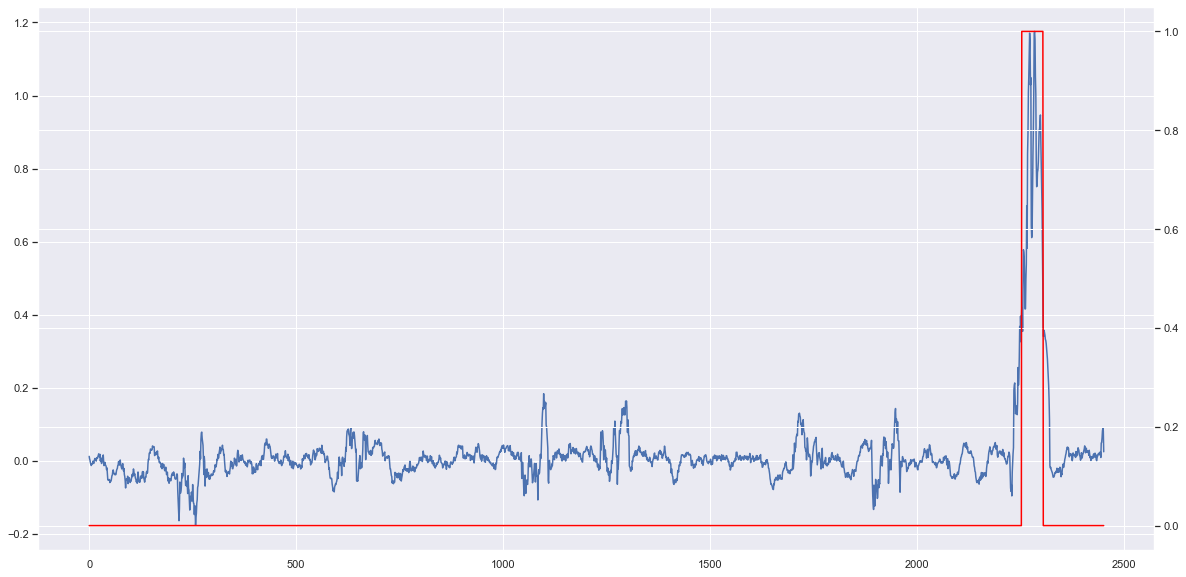

In [18]:
#validate prediction
ax = model.predict(x).plot()
ax2 = ax.twinx()
ax2.plot(df_stdev['PUMP FAILURE (1 or 0)'], 'red')
plt.show()